In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
def load_df(path):
    # Create a DataFrame from the data
    df = pd.read_csv(path)
    df['Query_time'] = df['Query_time'].astype(int)
    df['Memory'] = df['Memory'].astype(int)
    df['CPU'] = df['CPU'].astype(float)
    df['Ping'] = df['Ping'].astype(float)
    for name in ["Query_time", 'CPU','Memory','Ping']:
        df[name+'_avg'] = df[name].rolling(window=10).mean()
        df[name+'_avg'] = df[name+'_avg'].fillna(method='ffill')
        df[name+'_avg'] = df[name+'_avg'].fillna(method='bfill')
    # Assuming 'df' is your DataFrame with the desired column named 'Time' as a datetime column
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
    df['T'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds()
    df['Elapsed_time'] = (df['Time'] - df['Time'].iloc[0]).dt.total_seconds()
    df['Time'] = df['Time'].dt.strftime('%H:%M:%S')
    # Set the 'Time' column as the index of the DataFrame
    df.set_index('T', inplace=True)
    return df

def plot_with_ma(df, col):
    ylabel = col.replace('_', ' ')
    # Plot the desired column as a time series
    ax = df[col].plot(label='Data')
    df[col+"_avg"].shift(-5).plot(color="red",label='Moving Average', ax=ax)
    # Set plot labels
    plt.xlabel('Time elapsed (s)')
    plt.ylabel(ylabel+" (ms)")
    plt.legend(loc='upper right')
    plt.axvline(60, color='black', alpha=0.4)
    plt.axvline(180, color='black', alpha=0.4)
    plt.xlim(0, 239)
    plt.ylim(0, max(df[col])*1.1)
    # Display the plot
    # plt.rcParams["figure.figsize"] = (3,4)
    plt.show()

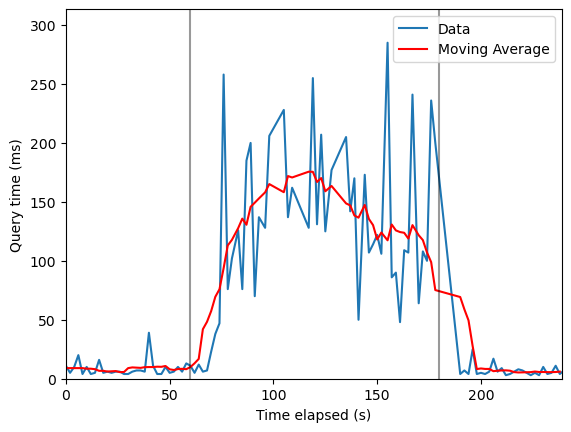

In [6]:
df = load_df('full_data/network_ANY_10K.csv')
plot_with_ma(df, "Query_time")

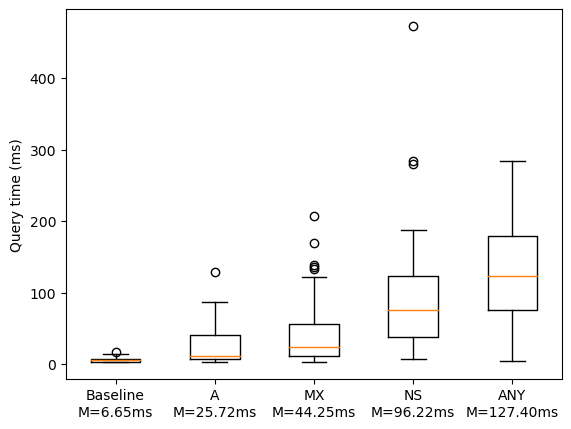

In [62]:
# List of filenames
filenames = ["A_10K", "MX_10K", "NS_10K", "ANY_10K"]
xlabels = ["Baseline", "A", "MX", "NS", "ANY"]
# Column to create boxplots for
column_name = 'Query_time'

# List to store the data for each boxplot
data = []

df = load_df('full_data/network_A_10K.csv')
# Extract the column data and append to the list
column_data = df[df['Elapsed_time'] < 60][column_name]
mean_value = column_data.mean()
xlabels[0] = xlabels[0] + f"\nM={mean_value:.2f}ms"
data.append(column_data)

# Iterate over filenames
for i,f in enumerate(filenames):
    filename = 'full_data/network_' + f + '.csv'
    # Import file as DataFrame
    df = load_df(filename)

    # Extract the column data and append to the list
    column_data = df[(df['Elapsed_time'] > 60) & (df['Elapsed_time'] < 180)][column_name]
    mean_value = column_data.mean()
    xlabels[i+1] = xlabels[i+1] + f"\nM={mean_value:.2f}ms"
    data.append(column_data)

# Create the boxplot
plt.figure()
plt.boxplot(data)
plt.ylabel("Query time (ms)")
# plt.ylim(0, 300)
plt.xticks(range(1, len(xlabels) + 1), xlabels)  # Set the x-axis tick labels as filenames


plt.show()

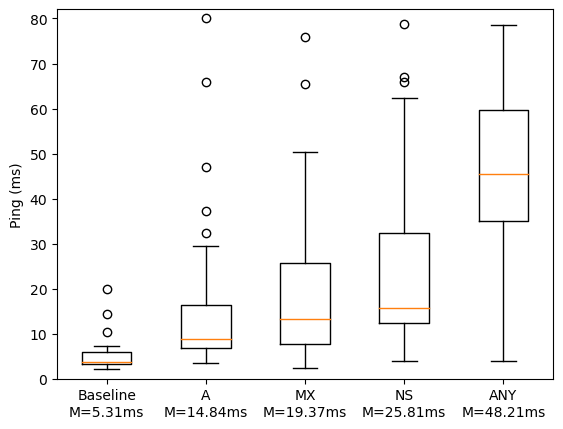

In [7]:
# List of filenames
filenames = ["A_10K", "MX_10K", "NS_10K", "ANY_10K"]
xlabels = ["Baseline", "A", "MX", "NS", "ANY"]
# Column to create boxplots for
column_name = 'Ping'

# List to store the data for each boxplot
data = []

df = load_df('full_data/network_A_10K.csv')
# Extract the column data and append to the list
column_data = df[df['Elapsed_time'] < 60][column_name]
mean_value = column_data.mean()
xlabels[0] = xlabels[0] + f"\nM={mean_value:.2f}ms"
data.append(column_data)

# Iterate over filenames
for i,f in enumerate(filenames):
    filename = 'full_data/network_' + f + '.csv'
    # Import file as DataFrame
    df = load_df(filename)

    # Extract the column data and append to the list
    column_data = df[(df['Elapsed_time'] > 60) & (df['Elapsed_time'] < 180)][column_name]
    mean_value = column_data.mean()
    xlabels[i+1] = xlabels[i+1] + f"\nM={mean_value:.2f}ms"
    data.append(column_data)

# Create the boxplot
plt.figure()
plt.boxplot(data)
plt.ylabel("Ping (ms)")
plt.ylim(0, 82)
plt.xticks(range(1, len(xlabels) + 1), xlabels)  # Set the x-axis tick labels as filenames


plt.show()

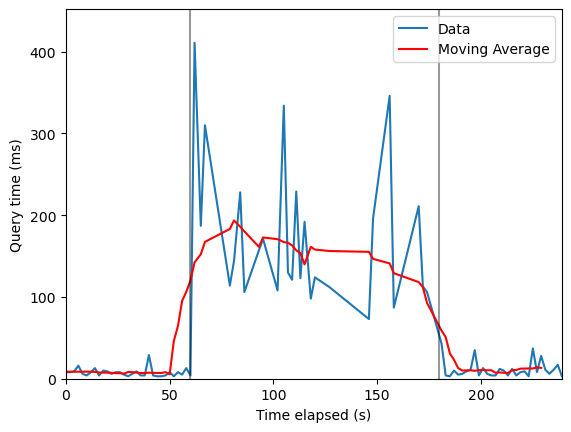

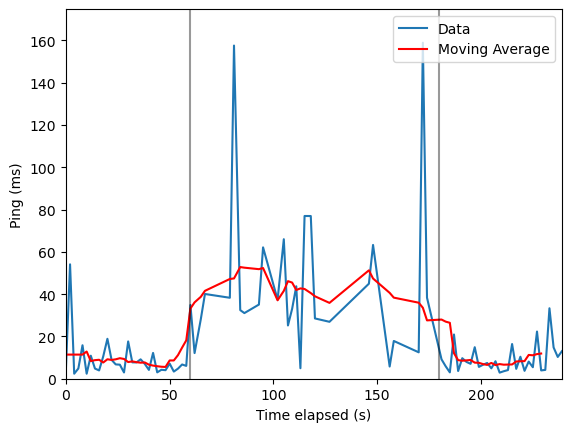

In [3]:
df = load_df('full_data/network_ANY_50K.csv')
plot_with_ma(df, "Query_time")
plot_with_ma(df, "Ping")

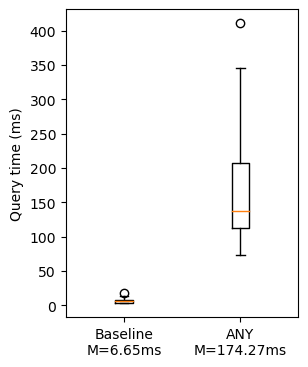

In [27]:
# List of filenames
filenames = [ "ANY_50K"]
xlabels = ["Baseline", "ANY"]
# Column to create boxplots for
column_name = 'Query_time'

# List to store the data for each boxplot
data = []

df = load_df('full_data/network_A_10K.csv')
# Extract the column data and append to the list
column_data = df[df['Elapsed_time'] < 60][column_name]
mean_value = column_data.mean()
xlabels[0] = xlabels[0] + f"\nM={mean_value:.2f}ms"
data.append(column_data)

# Iterate over filenames
for i,f in enumerate(filenames):
    filename = 'full_data/network_' + f + '.csv'
    # Import file as DataFrame
    df = load_df(filename)

    # Extract the column data and append to the list
    column_data = df[(df['Elapsed_time'] > 60) & (df['Elapsed_time'] < 180)][column_name]
    mean_value = column_data.mean()
    xlabels[i+1] = xlabels[i+1] + f"\nM={mean_value:.2f}ms"
    data.append(column_data)

# Create the boxplot
plt.figure()
plt.boxplot(data)
plt.ylabel("Query time (ms)")
# plt.ylim(0, 300)
plt.xticks(range(1, len(xlabels) + 1), xlabels)  # Set the x-axis tick labels as filenames

plt.rcParams["figure.figsize"] = (3,4)
plt.show()